**Goals of the Notebook**

This Notebook aims at craeting cool
Following previous [Ironhack challenges focused on the Pokemon dataset](https://github.com/Binardino/IronHack-Data-Analysis-Module-1-Python/blob/master/Pandas%20-%20df_calculation_%26_transformation%20Sales%20%26%20Pokemon%20-%203%20challenges/your-code/challenge-2-Pokemon_Types%26Correlation.ipynb), I am using that dataset anew in order to produce various types of data visualizations.
The idea is to mix various data visualzations libraries : Seaborn, Plotly & classical Matplotlib

**Key question to answer**
- which are the strongest & weakest pokemons ? 
- which types - and which type combinations - have the strongest ones ?
- are the different characteristics correlated ?

**Importing libraries**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import re
import random

**Setting sns style**

In [3]:
# sns.set_style(style='GnBu_d')
sns.set(style = 'darkgrid', palette='deep', rc = {'figure.figsize':(20,10)}) 
#figsize is not a param for sns.set BUT using rc & a dict, possible to add new params

**Importing dataset**

In [84]:
df_pokemon = pd.read_csv(r'data/pokemon.csv')

In [85]:
df_pokemon.head(20)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0    1                  Bulbasaur  Grass  Poison    318  45      49       49   
1    2                    Ivysaur  Grass  Poison    405  60      62       63   
2    3                   Venusaur  Grass  Poison    525  80      82       83   
3    3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4    4                 Charmander   Fire     NaN    309  39      52       43   
5    5                 Charmeleon   Fire     NaN    405  58      64       58   
6    6                  Charizard   Fire  Flying    534  78      84       78   
7    6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8    6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9    7                   Squirtle  Water     NaN    314  44      48       65   
10   8                  Wartortle  Water     NaN    405  59      63       80   
11   9                  Blastoise  Water     NaN    530  79      83      100   
12   9    BlastoiseMega Blastoise  Water     NaN    630  79     103      120   
13  10                   Caterpie    Bug     NaN    195  45      30       35   
14  11                    Metapod    Bug     NaN    205  50      20       55   
15  12                 Butterfree    Bug  Flying    395  60      45       50   
16  13                     Weedle    Bug  Poison    195  40      35       30   
17  14                     Kakuna    Bug  Poison    205  45      25       50   
18  15                   Beedrill    Bug  Poison    395  65      90       40   
19  15      BeedrillMega Beedrill    Bug  Poison    495  65     150       40   

    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        65       65     45           1      False  
1        80       80     60           1      False  
2       100      100     80           1      False  
3       122      120     80           1      False  
4        60       50     65           1      False  
5        80       65     80           1      False  
6       109       85    100           1      False  
7       130       85    100           1      False  
8       159      115    100           1      False  
9        50       64     43           1      False  
10       65       80     58           1      False  
11       85      105     78           1      False  
12      135      115     78           1      False  
13       20       20     45           1      False  
14       25       25     30           1      False  
15       90       80     70           1      False  
16       20       20     50           1      False  
17       25       25     35           1      False  
18       45       80     75           1      False  
19       15       80    145           1      False

**Data Wrangling**

In [86]:
# cleaning row with junk names where Mega pokemons have name doubled
# e.g "VenusaurMega Venusaur" should be "Mega Venusaur; "CharizardMega Charizard X" = "Mega Charizard X".
# same issue with doubling name "Hoopa" - e.g. cf. line 797 & 798

df_pokemon['Name'] = df_pokemon['Name'].apply(lambda row: re.sub(r'\w+Mega', 'Mega', row))

df_pokemon['Name'] = df_pokemon['Name'].apply(lambda row: re.sub(r'(HoopaHoopa)(.+)', 'Hoopa'+r'\2', row))


df_pokemon.tail(10)

#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
790  714            Noibat   Flying  Dragon    245   40      30       35   
791  715           Noivern   Flying  Dragon    535   85      70       80   
792  716           Xerneas    Fairy     NaN    680  126     131       95   
793  717           Yveltal     Dark  Flying    680  126     131       95   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   
795  719           Diancie     Rock   Fairy    600   50     100      150   
796  719      Mega Diancie     Rock   Fairy    700   50     160      110   
797  720    Hoopa Confined  Psychic   Ghost    600   80     110       60   
798  720     Hoopa Unbound  Psychic    Dark    680   80     160       60   
799  721         Volcanion     Fire   Water    600   80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
790       45       40     55           6      False  
791       97       80    123           6      False  
792      131       98     99           6       True  
793      131       98     99           6       True  
794       81       95     95           6       True  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True

In [87]:
# #dropping the '#' column : useless for the following dataviz work
# df_pokemon.drop(columns='#', inplace=True)

# Part I - Basic Descriptive Statistics

**Analyzing main features**
- classical .describe()
- finding out strongest & weakest ones

In [88]:
df_pokemon.describe().astype(float).round(decimals=2)

#   Total      HP  Attack  Defense  Sp. Atk  Sp. Def   Speed  \
count  800.00  800.00  800.00  800.00   800.00   800.00   800.00  800.00   
mean   362.81  435.10   69.26   79.00    73.84    72.82    71.90   68.28   
std    208.34  119.96   25.53   32.46    31.18    32.72    27.83   29.06   
min      1.00  180.00    1.00    5.00     5.00    10.00    20.00    5.00   
25%    184.75  330.00   50.00   55.00    50.00    49.75    50.00   45.00   
50%    364.50  450.00   65.00   75.00    70.00    65.00    70.00   65.00   
75%    539.25  515.00   80.00  100.00    90.00    95.00    90.00   90.00   
max    721.00  780.00  255.00  190.00   230.00   194.00   230.00  180.00   

       Generation  
count      800.00  
mean         3.32  
std          1.66  
min          1.00  
25%          2.00  
50%          3.00  
75%          5.00  
max          6.00

In [89]:
df_pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [90]:
#counting amount of Pokemon per Generation
df_pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [91]:
#Many Pokemon have only One Type but no Type 2
# filling Type 2 = NaN with None

df_pokemon['Type 2'].fillna(value='', inplace=True)

In [92]:
# function to create new 'Combo Type' column, mixing up two existing Types
def combo_type_creator(row):
    if row['Type 2'] =='':
        return row['Type 1']
    else:
        return row['Type 1'] + '-' + row['Type 2']

In [93]:
df_pokemon['Combo_Type'] = df_pokemon.apply(lambda row: combo_type_creator(row), axis=1)

In [94]:
df2 = pd.Series(df_pokemon['Combo_Type'].str.split(pat='-').sum()).value_counts()

df2

Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
dtype: int64

The idea of this exercise is to find strongest regular pokemons

Legendary pokemons are, by definition, the strongest pokemons, and are not naturally catchable (in each games, there is only One Legendary pokemon to catch in particular circumstances), therefore let's create a sub df with only regular non-legendary pokemons, in order to have less noisy data

In [95]:
df_regular_pokemon = df_pokemon[df_pokemon['Legendary'] != True].copy()

df_regular_pokemon.drop(columns='Legendary', inplace=True)

spliting datasets into two subdatasets : 
- df_pokedex = all categorical values i.e. ID, name, Generation, Legendary, Type1 & Type2
- df_pokestats = all stats : Type1 & Type2, Total, HP, Attack , Defense, Sp. Atk, Sp. Def, Speed

I want to know which Types are the strongest so I'm keeping both Type variables in both df in order to measure their impact on overall stats

In [96]:
df_pokedex = df_regular_pokemon[['#', 'Name', 'Type 1', 'Type 2', 'Generation']]

df_pokestats = df_regular_pokemon[['#', 'Type 1', 'Type 2','Total', 'HP', 'Attack' , 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

**Which are the Strongest Pokemons ?**

Before doing any particular data processing, let's dive right in : which are the strongest ones ?

In [97]:
df_regular_pokemon.nlargest(n=10, columns='Total').drop_duplicates(subset='#') 
#dropping duplicates # to avoid having duplicates Pokemons with same # (due to evoluion or X/Y Types)

#              Name  Type 1   Type 2  Total   HP  Attack  Defense  \
268  248    Mega Tyranitar    Rock     Dark    700  100     164      150   
409  373    Mega Salamence  Dragon   Flying    700   95     145      130   
413  376    Mega Metagross   Steel  Psychic    700   80     145      150   
494  445     Mega Garchomp  Dragon   Ground    700  108     170      115   
313  289           Slaking  Normal             670  150     160      100   
141  130     Mega Gyarados   Water     Dark    640   95     155      109   
283  260     Mega Swampert   Water   Ground    635  100     150      110   
7      6  Mega Charizard X    Fire   Dragon    634   78     130      111   
12     9    Mega Blastoise   Water             630   79     103      120   

     Sp. Atk  Sp. Def  Speed  Generation     Combo_Type  
268       95      120     71           2      Rock-Dark  
409      120       90    120           3  Dragon-Flying  
413      105      110    110           3  Steel-Psychic  
494      120       95     92           4  Dragon-Ground  
313       95       65    100           3         Normal  
141       70      130     81           1     Water-Dark  
283       95      110     70           3   Water-Ground  
7        130       85    100           1    Fire-Dragon  
12       135      115     78           1          Water

**Which are the Weakest Pokemons ?**

On the contrary, let's find out which are the weakest ones

In [98]:
df_regular_pokemon.sort_values(by='Total').drop_duplicates(subset='#').head(10)
#dropping duplicates # to avoid having duplicates Pokemons with same # (due to evoluion or X/Y Types)

#        Name   Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
206  191     Sunkern    Grass            180  30      30       30       30   
322  298     Azurill   Normal   Fairy    190  50      20       40       20   
446  401   Kricketot      Bug            194  37      25       41       25   
16    13      Weedle      Bug  Poison    195  40      35       30       20   
13    10    Caterpie      Bug            195  45      30       35       20   
288  265     Wurmple      Bug            195  45      45       35       20   
303  280       Ralts  Psychic   Fairy    198  28      25       25       45   
381  349      Feebas    Water            200  20      15       20       10   
732  664  Scatterbug      Bug            200  38      35       40       27   
139  129    Magikarp    Water            200  20      10       55       15   

     Sp. Def  Speed  Generation     Combo_Type  
206       30     30           2          Grass  
322       40     20           3   Normal-Fairy  
446       41     25           4            Bug  
16        20     50           1     Bug-Poison  
13        20     45           1            Bug  
288       30     20           3            Bug  
303       35     40           3  Psychic-Fairy  
381       55     80           3          Water  
732       25     35           6            Bug  
139       20     80           1          Water

We can already have an idea of which Types have the strongest & weakest ones through those operations

# Part II - Data Visualization

## 1 - Plotting basic distributions

One of the original assumption was that Legnedary Pokemons are way stronger than regular ones and are skewing the data - which is why we took them away from the regular dataframe.
Just to be sure, let's check it by comparing the 'Total' feature of Legendary VS. Regular ones with a Boxplot

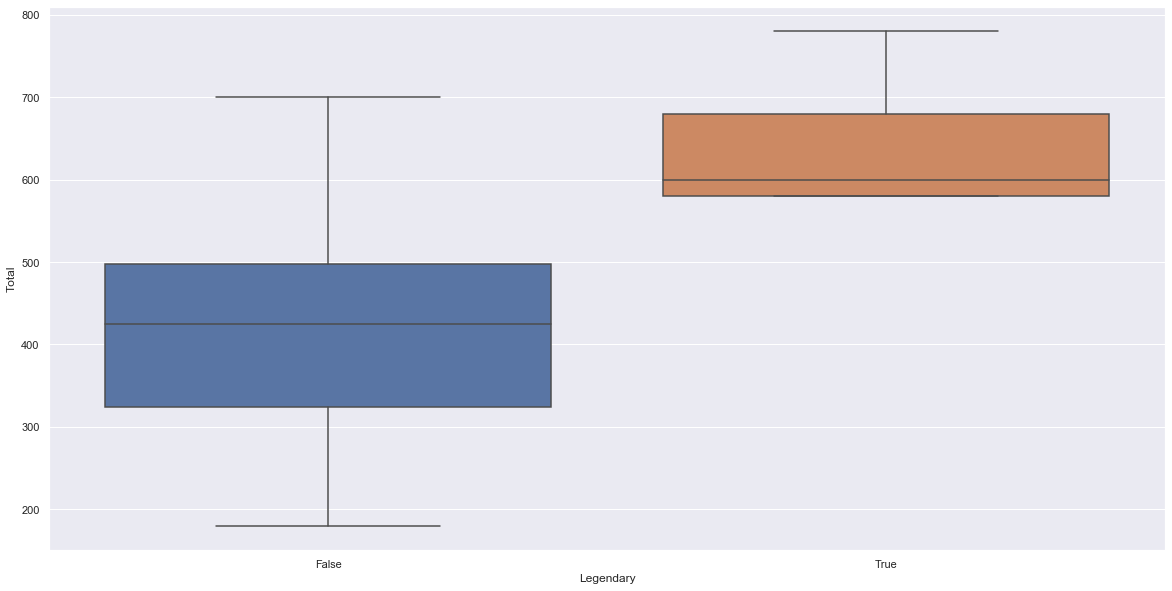

In [109]:
sns.boxplot(x='Legendary', y='Total', data=df_pokemon)

Indeed Legendary ones have in average a much higher 'Total'.

Now let's plot all 6 features to measure their distribution.

In [105]:
#creating subplot with only 6 features top plot - i.e. dropping Total (sum of 6 features), Generation & Legendary
df_pokemon_features = df_pokemon.drop(columns=['#','Total', 'Generation', 'Legendary'])

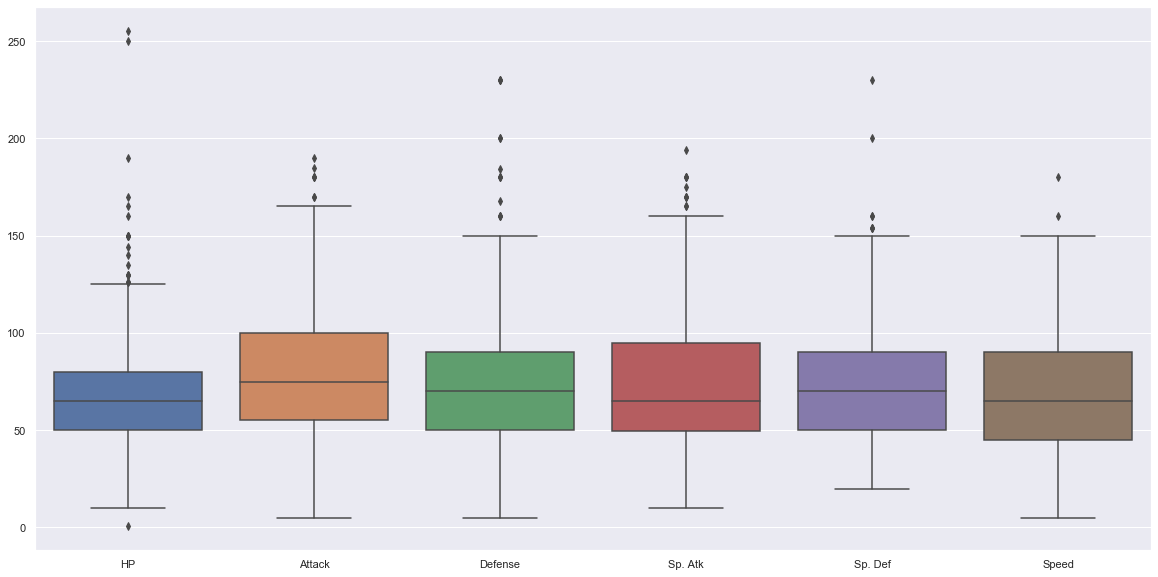

In [106]:
sns.boxplot(data=df_pokemon_features)

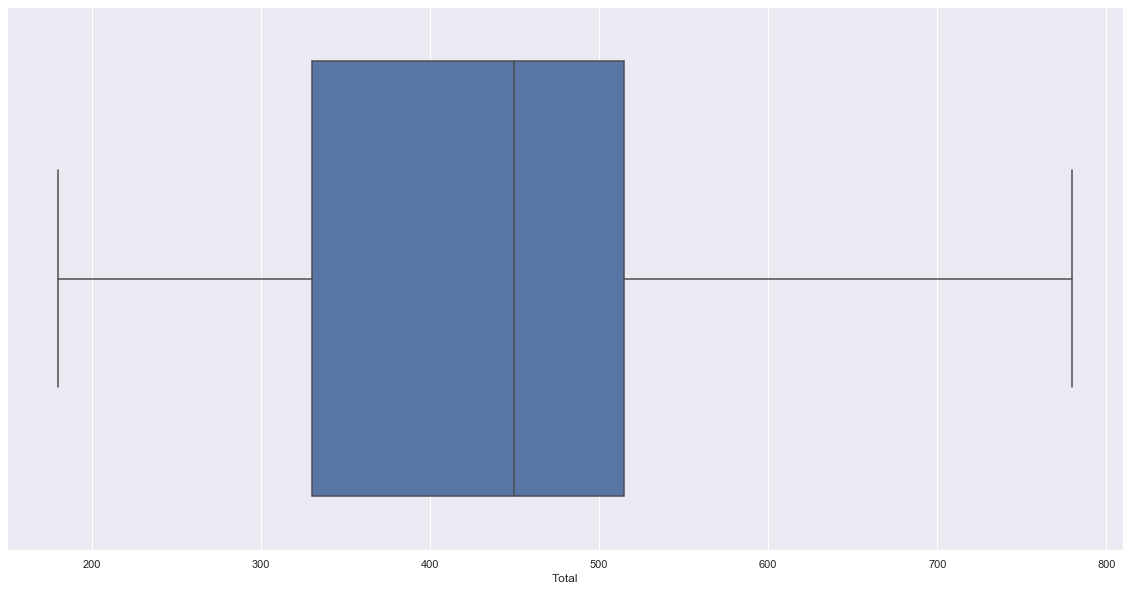

In [112]:
#classical boxplot to visualize distribution of Total feature
sns.boxplot(df_pokemon['Total'])#C

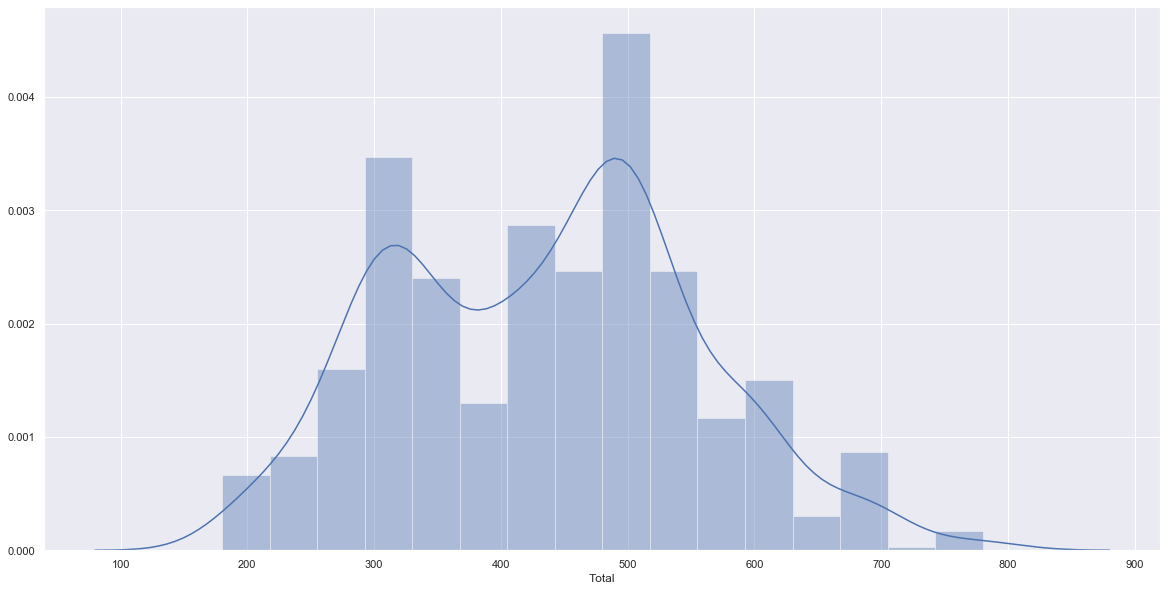

In [31]:
#distplot to visualize distribution of Total feature
sns.distplot(df_pokemon['Total'])

In [114]:
#same distplot with Pyplot to make it interactive through hovering
ff.create_distplot([df_pokemon.Total], ['Total'], bin_size=20)

In [115]:
# combined distplot with Pyplot of both Defense & Attack measure their distribution
ff.create_distplot([df_pokemon.Attack, df_pokemon.Defense], ['Attack', 'Defense'], bin_size=5)

In [34]:
fig = px.histogram(df_pokemon, x="Total", 
                   hover_data=df_pokemon.columns)
fig.show()

In [119]:
from plotly.offline import init_notebook_mode, iplot

In [120]:
hp_distplot = ff.create_distplot([df_pokemon.HP], ['HP'], bin_size=5)
iplot(hp_distplot, filename='HP Distplot')

attack_defense_distplot = ff.create_distplot([df_pokemon.Attack, df_pokemon.Defense], ['Attack', 'Defense'], bin_size=5)
iplot(attack_defense_distplot, filename='Attack/Defense Distplot')

In thoery each Generation are balanced with comparable stats, but is there a Generation which outperforms others ?

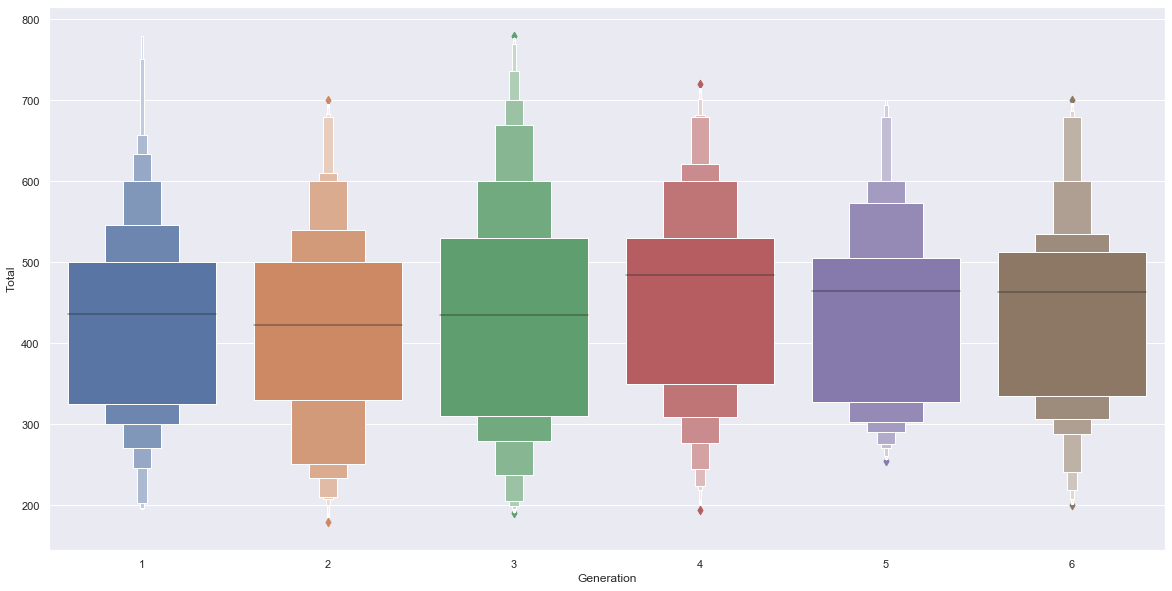

In [38]:
sns.boxenplot(x='Generation', y='Total', data=df_pokemon)

## 2 - Comparing Types

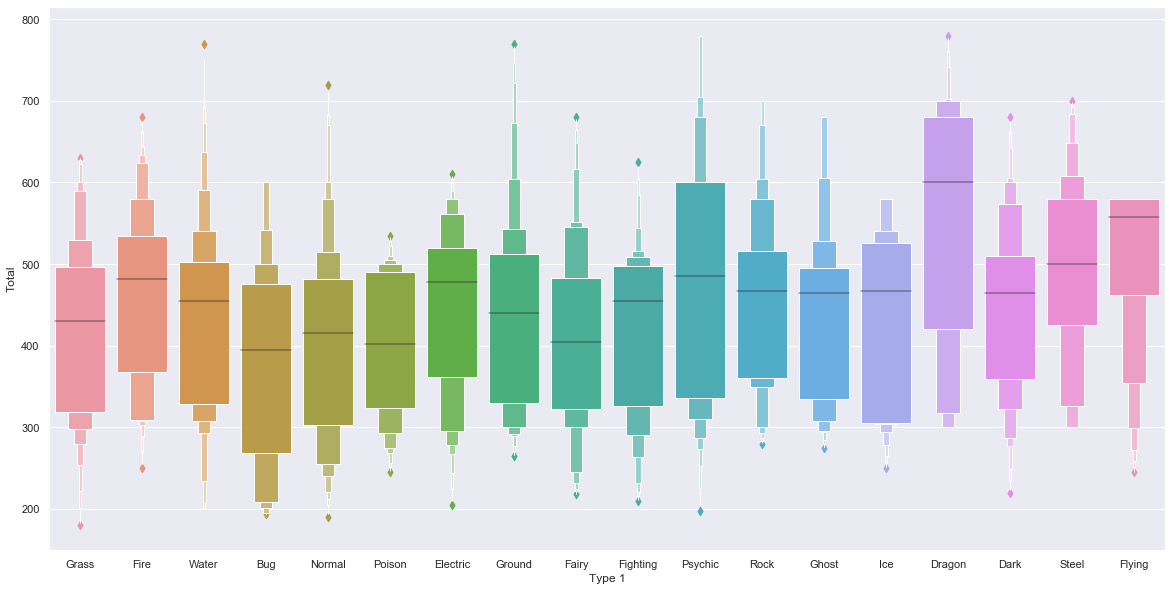

In [39]:
sns.boxenplot(x='Type 1', y='Total', data=df_pokemon)

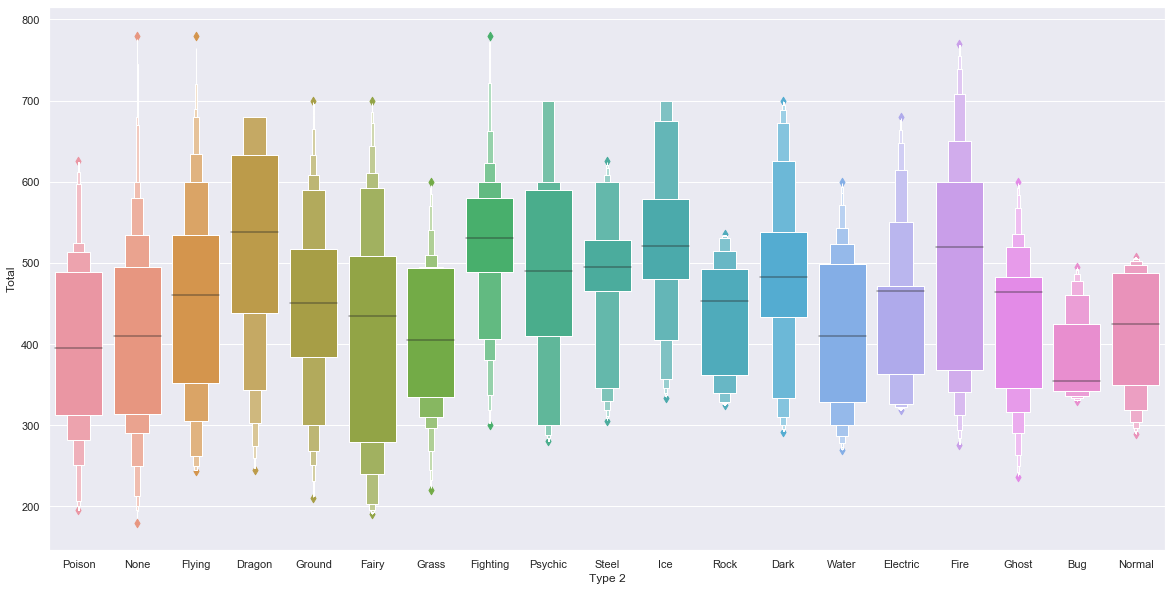

In [40]:
sns.boxenplot(x='Type 2', y='Total', data=df_pokemon)

**Plotting Type distribution**

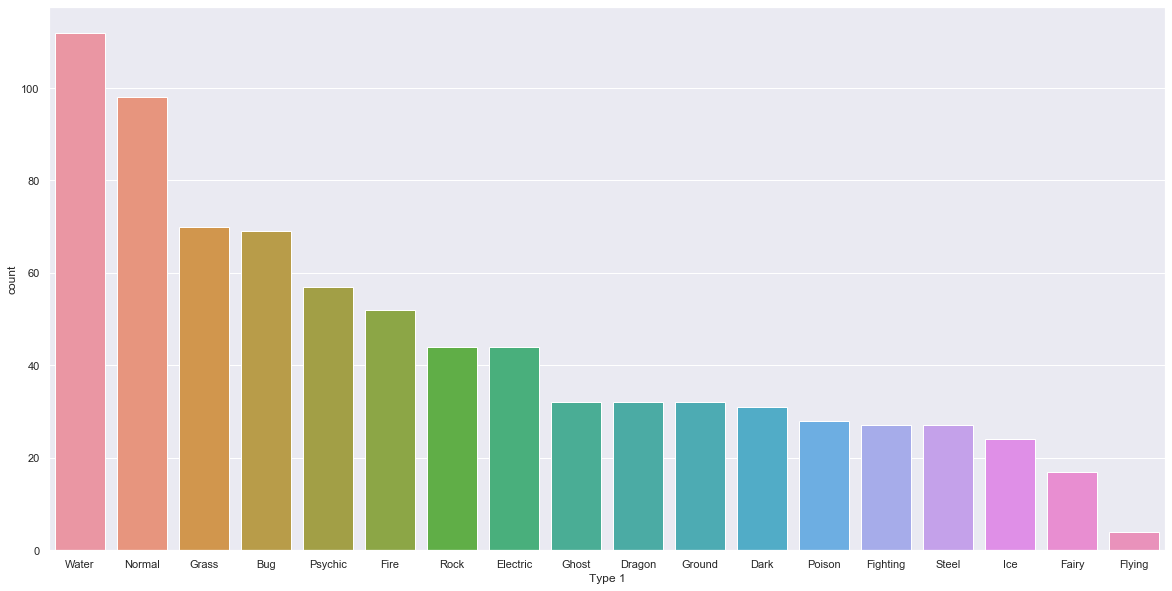

In [22]:
sns.countplot(x='Type 1',
             data=df_pokemon,
             order=df_pokemon['Type 1'].value_counts().index)

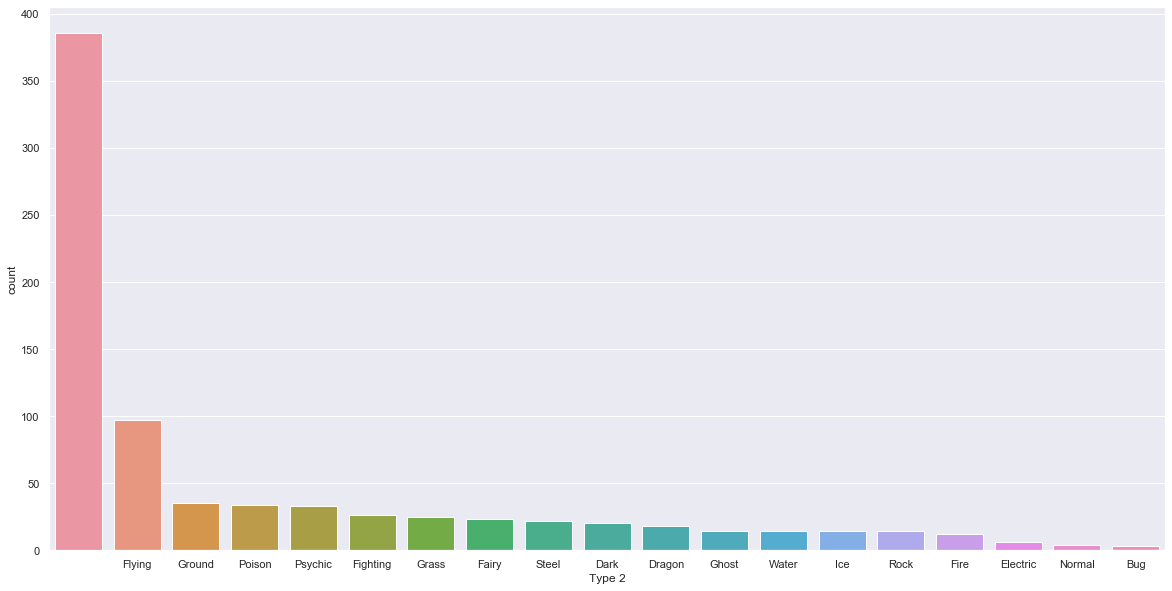

In [100]:
sns.countplot(x='Type 2',
             data=df_pokemon,
             order=df_pokemon['Type 2'].value_counts().index)

In [24]:
# df_pokemon['Combo_Type'].str.split(pat='-').sum().value_counts()

In [25]:
dfcombotype = pd.DataFrame(pd.Series(df_pokemon['Combo_Type'].str.split(pat='-').sum()).value_counts())

dfcombotype.drop('None', inplace=True)

dfcombotype.reset_index(inplace=True)

dfcombotype.columns = ['type', 'count']

In [26]:
dfcombotype

type  count
0      Water    126
1     Normal    102
2     Flying    101
3      Grass     95
4    Psychic     90
5        Bug     72
6     Ground     67
7       Fire     64
8     Poison     62
9       Rock     58
10  Fighting     53
11      Dark     51
12  Electric     50
13    Dragon     50
14     Steel     49
15     Ghost     46
16     Fairy     40
17       Ice     38

In [27]:
fig_type = px.treemap(dfcombotype,
                     path   = ['type'],
                     values = 'count')
fig_type.show()

**Some conclusions**
- Most Pokemon only have 1 Type
- Flying type is underrepresented in Type 1, but is the #1 2nd Type (i.e. many Pokemon have Flying as a complementary Type)
- I would have assumed Normal Type was the most common Type, but in fact Water is the most common one 

In [28]:
dual_pokemon = df_pokedex[df_pokedex['Type 2'] != 'None']

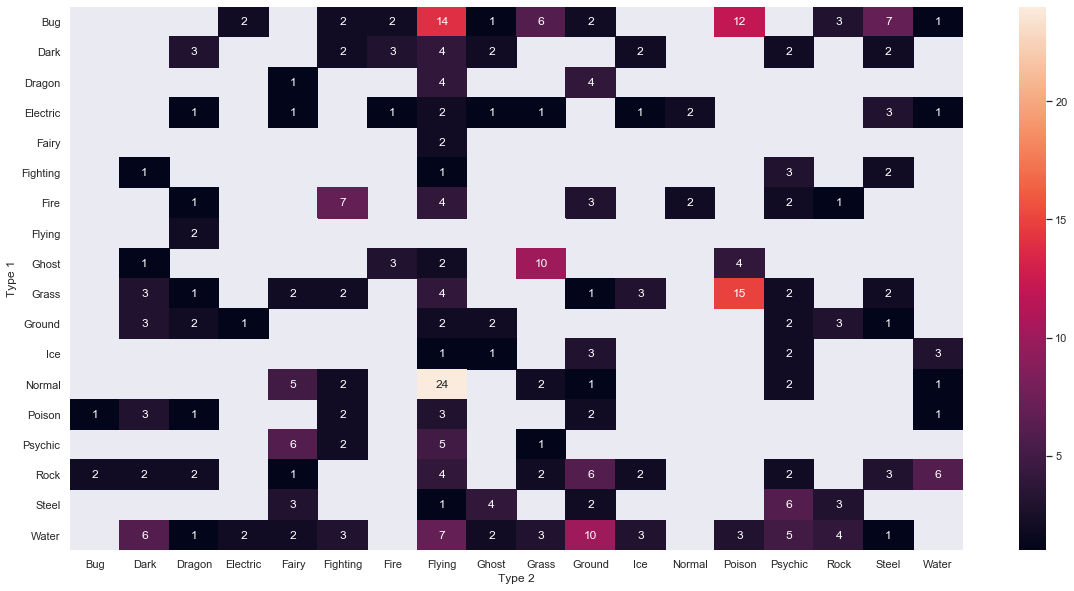

In [29]:
sns.heatmap(dual_pokemon.groupby(['Type 1', 'Type 2']).size().unstack(),
            linecolor='white',
            annot=True)

**Mapping Strongest & Weakest Pokemon types**

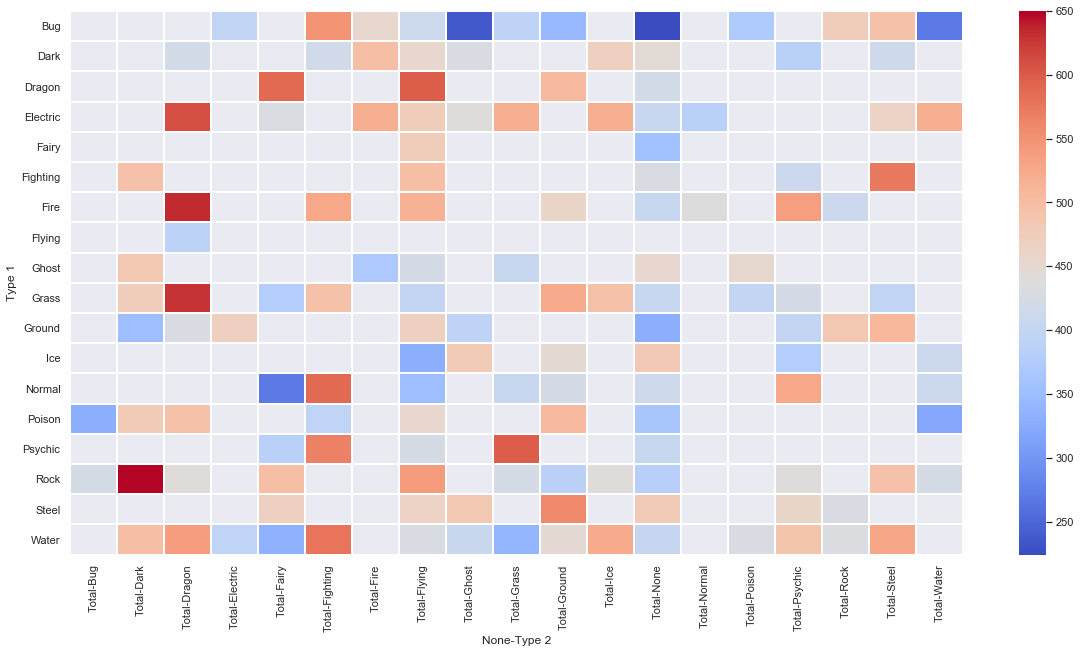

In [45]:
# creating sub df with crossed table of two Types to measure which Type combinations have the strongest & weakest combinations
# measuring over Median of "Total" feature
type_stacked = df_pokestats.groupby(['Type 1', 'Type 2']).agg({'Total':'median'})

sns.heatmap(
            type_stacked.unstack(),
            linewidths=1,
            cmap='coolwarm')

In [46]:
type_stacked.reset_index().sort_values('Total', ascending=False).head(10)

Type 1    Type 2  Total
106      Rock      Dark  650.0
43       Fire    Dragon  634.0
59      Grass    Dragon  630.0
25   Electric    Dragon  610.0
103   Psychic     Grass  600.0
22     Dragon    Flying  600.0
85     Normal  Fighting  590.0
21     Dragon     Fairy  590.0
128     Water  Fighting  580.0
42   Fighting     Steel  575.0

**Mapping Types VS. Features**

Are there importance infuence between Types & features ? i.e. are there certain Types which outperform with particular features ?

In [47]:
# creating new sub df focusing over Type 1 VS. 6 Features
# grouping by only Type 1 over Median for all 6 features - from .loc() HP to Speed  
# (adding 2nd type to the group by would generate a too hard to read heatmap with too many variables)

feature_stacked = df_regular_pokemon.groupby(['Type 1']).median().loc[:,'HP':'Speed']

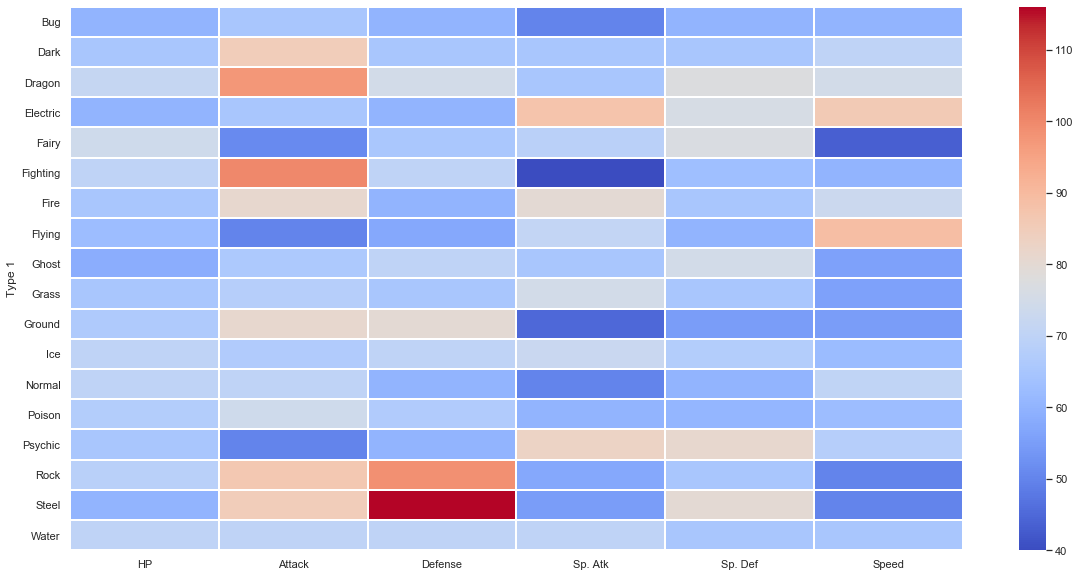

In [48]:
sns.heatmap(feature_stacked,
            linewidths=1,
            cmap='coolwarm'
            )

## 3 - Comparing 6 Features

Let's create a Correlation matrix of all 6 features
- The "Total" feature being the sum of all 6 features, it will be by definition strongly correlated to other features
- it might be nonetheless to measure which feature influences the most the "Total" one

In [42]:
df_corr = df_regular_pokemon[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr()

In [43]:
df_corr

Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.586473  0.699817  0.608721  0.685697  0.698582  0.520161
HP       0.586473  1.000000  0.377668  0.192426  0.299471  0.337606  0.109847
Attack   0.699817  0.377668  1.000000  0.437192  0.261879  0.211872  0.305346
Defense  0.608721  0.192426  0.437192  1.000000  0.186030  0.475241 -0.040796
Sp. Atk  0.685697  0.299471  0.261879  0.186030  1.000000  0.471164  0.393205
Sp. Def  0.698582  0.337606  0.211872  0.475241  0.471164  1.000000  0.212542
Speed    0.520161  0.109847  0.305346 -0.040796  0.393205  0.212542  1.000000

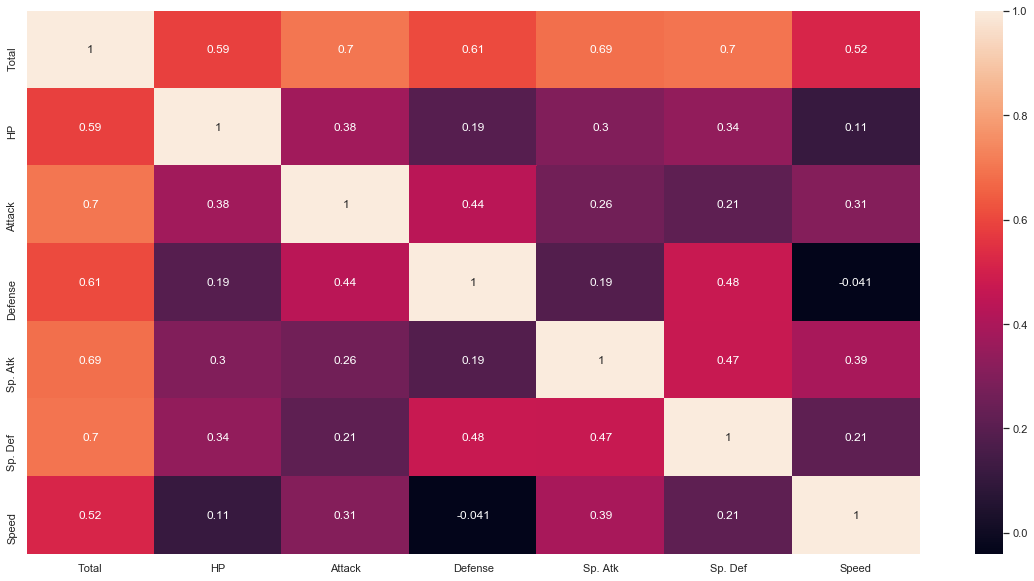

In [44]:
sns.heatmap(df_corr, annot=True)

**Plotting potential correlation between 6 features**

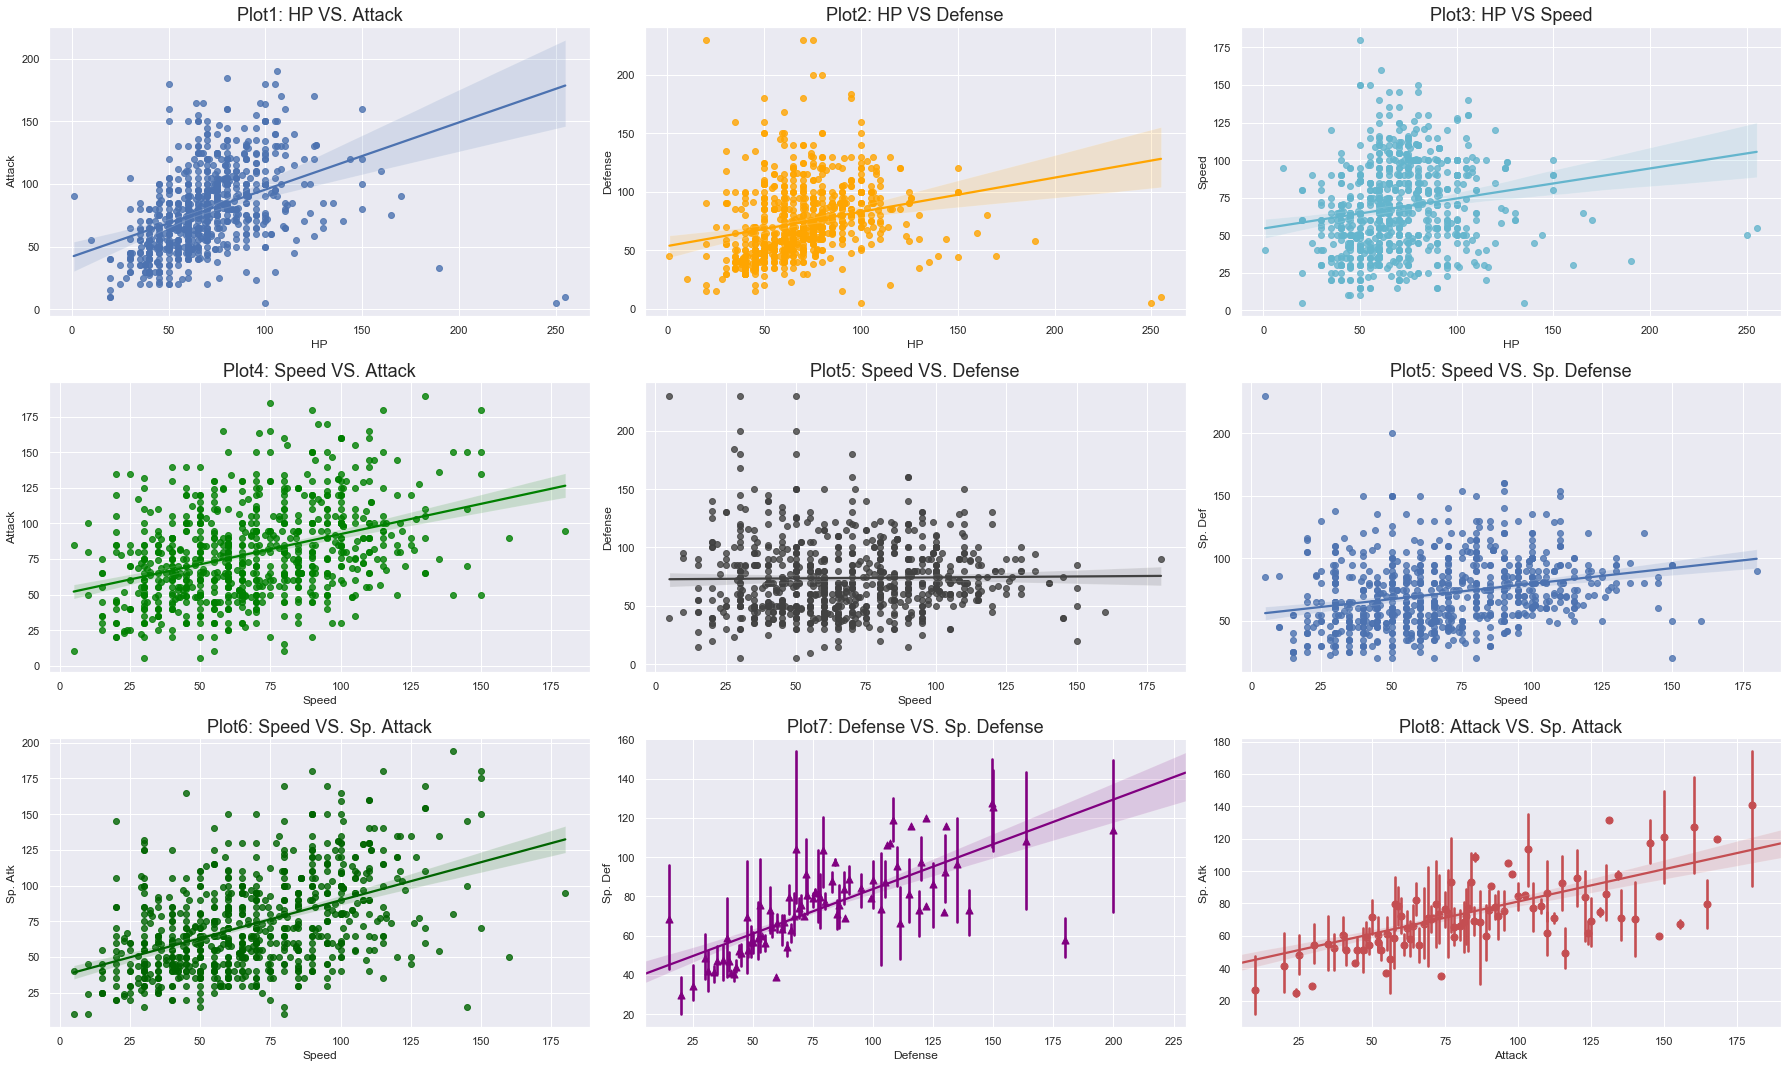

In [52]:
# fig, axs = plt.subplots(3,3, figsize=(20,10)) #3 by 3 subplots

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(25,15))


sns.regplot(x='HP', y='Attack', 
              data=df_pokemon, ax=ax1)
ax1.set_title("Plot1: HP VS. Attack", fontsize =18)

sns.regplot(x='HP', y='Defense', 
              data=df_pokemon, ax=ax2,  color = 'orange')
ax2.set_title("Plot2: HP VS Defense", fontsize =18)

sns.regplot(x='HP', y='Speed', 
              data=df_pokemon, ax=ax3,  color = 'c')
ax3.set_title("Plot3: HP VS Speed", fontsize =18)

sns.regplot(x='Speed', y='Attack', 
              data=df_pokemon, ax=ax4,  color = 'green')
ax4.set_title("Plot4: Speed VS. Attack", fontsize =18)

sns.regplot(x='Speed', y='Defense', 
              data=df_pokemon, ax=ax5, color = '.255')
ax5.set_title("Plot5: Speed VS. Defense", fontsize =18)

sns.regplot(x='Speed', y='Sp. Def', 
              data=df_pokemon, ax=ax6, color = 'b')
ax6.set_title("Plot5: Speed VS. Sp. Defense", fontsize =18)

sns.regplot(x='Speed', y='Sp. Atk', 
              data=df_pokemon, ax=ax7, color = 'darkgreen')
ax7.set_title("Plot6: Speed VS. Sp. Attack", fontsize =18)

sns.regplot(x='Defense', y='Sp. Def', 
              data=df_pokemon, ax=ax8, n_boot=50, x_bins = 250, marker='^', color = 'purple')
ax8.set_title("Plot7: Defense VS. Sp. Defense", fontsize =18)

sns.regplot(x='Attack', y='Sp. Atk', 
              data=df_pokemon, ax=ax9, x_bins = 250, color = 'r')
ax9.set_title("Plot8: Attack VS. Sp. Attack", fontsize =18)

fig.tight_layout() # To understand how this works see point and link 3

<Figure size 1440x720 with 0 Axes>

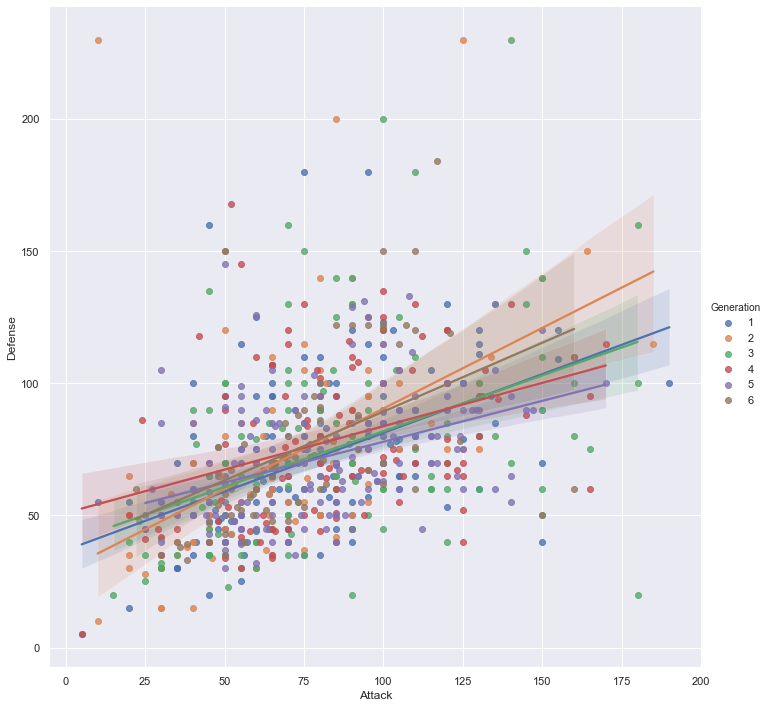

In [36]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Attack', y='Defense', data=df_pokemon,
          hue='Generation',
          height=10, aspect=1)

To finish out, le's scatter all pokemons at once with a PyPlot scatterplot, to map which are the strongests overall pokemons, in terms of Attack & Defense - with a Generation hue.

Truth be told, it is a messy plot which does not tell much - but it is a fun one - and one may hover to find out the name of each plot

In [124]:
px.scatter(df_pokemon, x='Attack', y='Defense', size='Total', 
           width=800, height=600,
           color='Generation', hover_name='Name')